# Multiple Linear regression for prediction car sales price

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Set the value of maximum row and column display to 500

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Read the given CSV file, and view some sample records

car_sales = pd.read_csv("CarPrice_Assignment.csv")
car_sales.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's inspect the various aspects of our dataframe

In [5]:
car_sales.shape

(205, 26)

In [6]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Missing values

* Here in all columns no missing values are present so we don't require any imputation 

In [7]:
car_sales.drop_duplicates(keep=False, inplace=False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Duplicate rows
* Here no duplicate rows found in the dataser

In [8]:
car_sales.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Drop the Id column as it doesn't having significance for modeling

car_sales = car_sales.drop(['car_ID'],axis = 1)

## Step 2: Visualising the Data

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

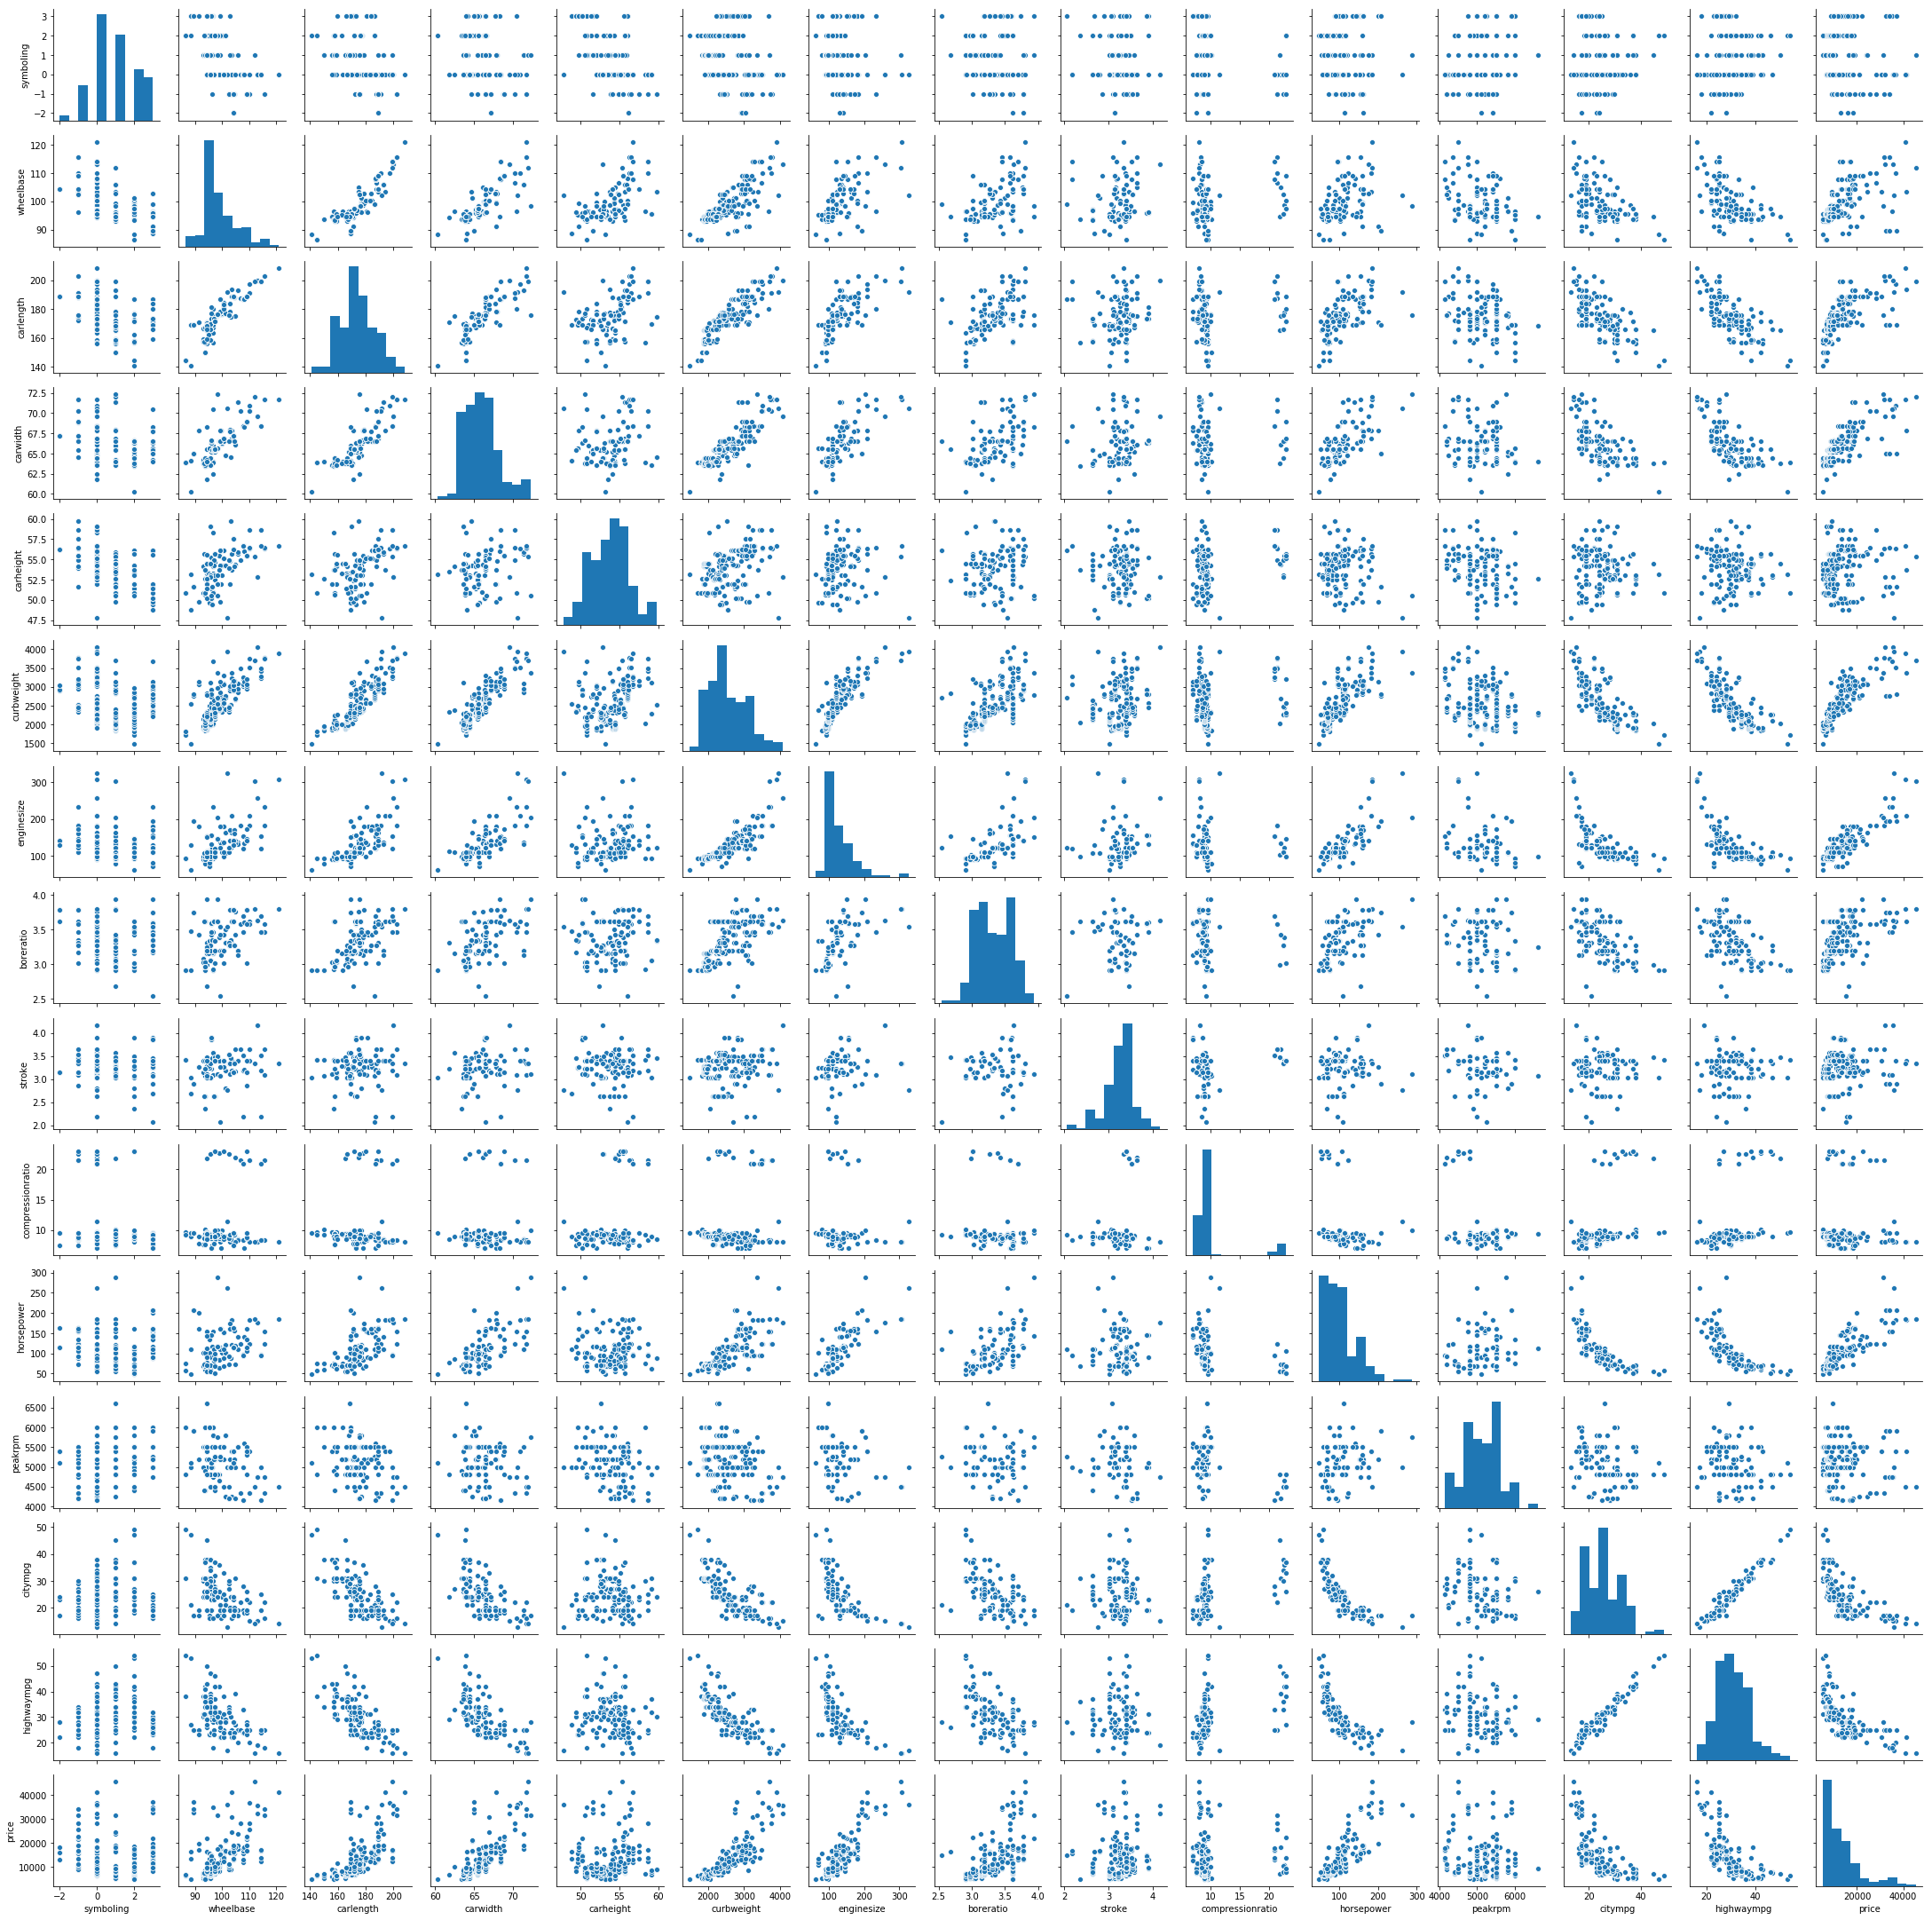

In [11]:
g = sns.pairplot(car_sales)
g.fig.set_size_inches(30,30)
#plt.figure(figsize=(60,100))
# plt.rcParams['figure.figsize']=(10,10)
plt.show()

## Extracting car company from name column 

In [12]:
car_sales['car_company'] = car_sales['CarName'].str.split(" ", n = 1, expand = True)[0]
car_sales = car_sales.drop(['CarName'],axis = 1)

#### Visualising Categorical Variables

In [13]:
cat_columns = car_sales.select_dtypes(include=['object']).columns.tolist()

In [14]:
numerical_columns = car_sales.select_dtypes(include=['int64','float64']).columns.tolist()

In [15]:
cat_columns

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_company']

In [16]:
cat_columns.remove('car_company')

In [17]:
len(cat_columns)

9

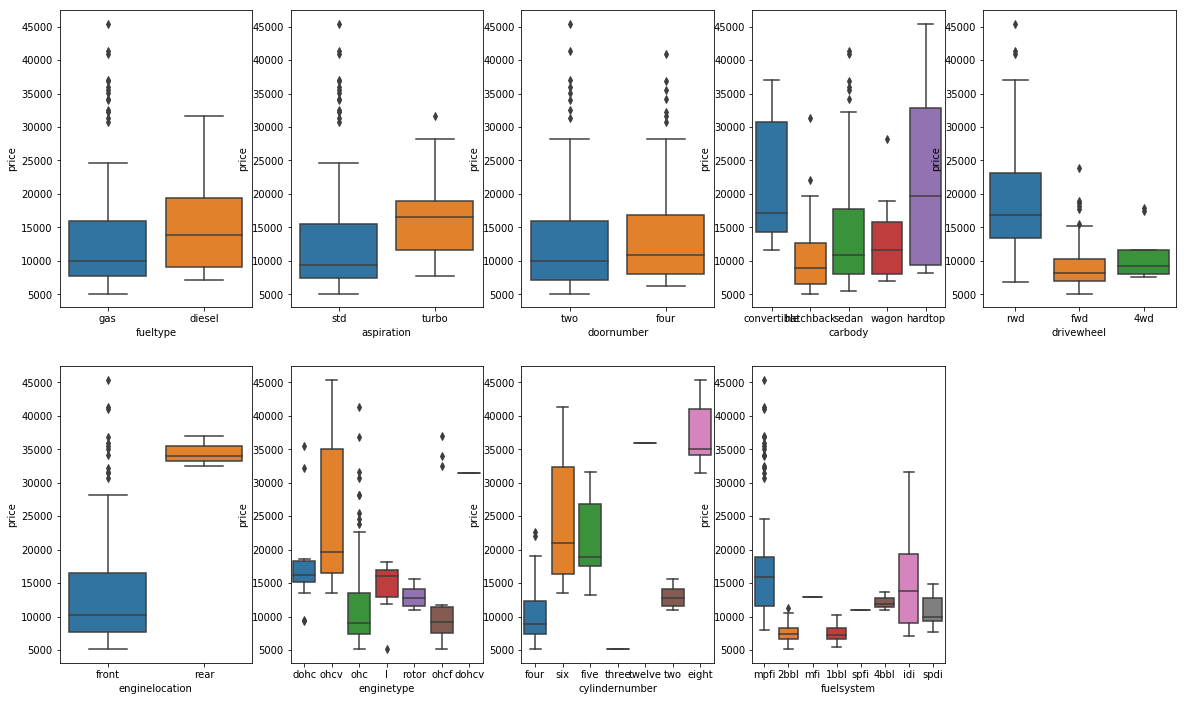

In [18]:
plt.figure(figsize=(20, 12))

for i,col in enumerate(cat_columns):
    plt.subplot(2,5,i+1)
    sns.boxplot(x = col, y = 'price', data = car_sales)
plt.show()    

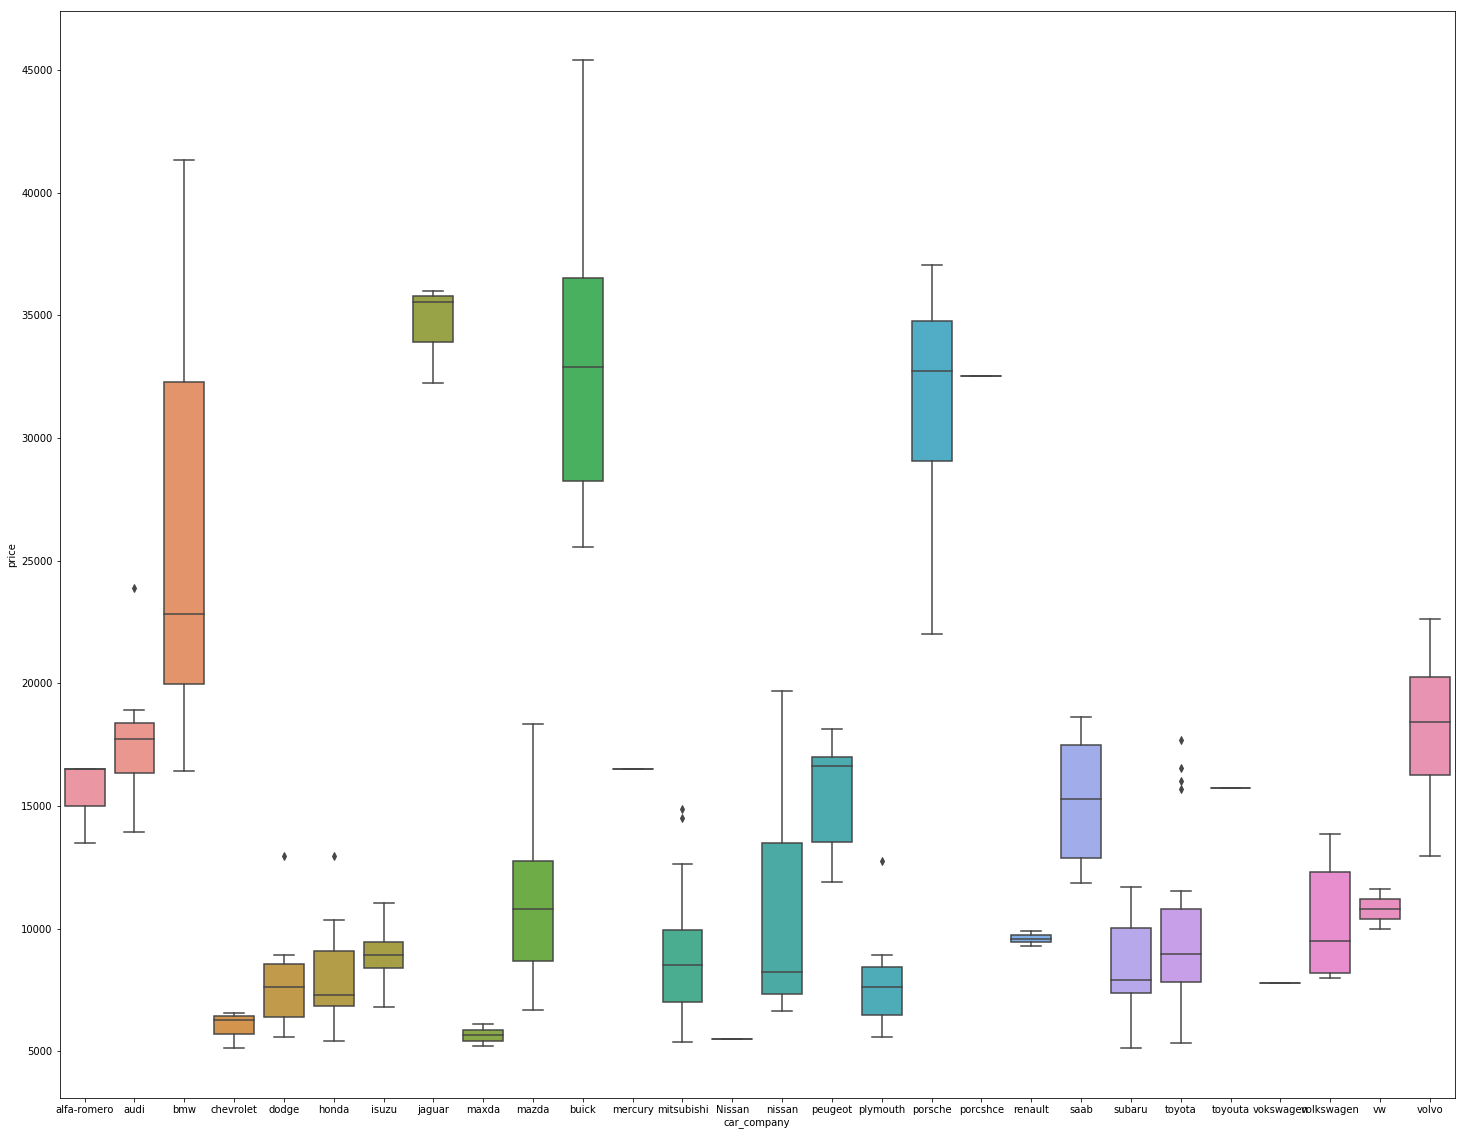

In [19]:
plt.figure(figsize=(25, 20))
sns.boxplot(x = 'car_company', y = 'price', data = car_sales)
plt.show()

## Step 3: Data Preparation

In [20]:
cat_columns = car_sales.select_dtypes(include=['object']).columns.tolist()

In [21]:
no_cat_different_variable = []
for col in cat_columns:
    no_cat_different_variable.append(car_sales[col].value_counts().count())

In [22]:
cat_dictionary = dict(zip(cat_columns, no_cat_different_variable))

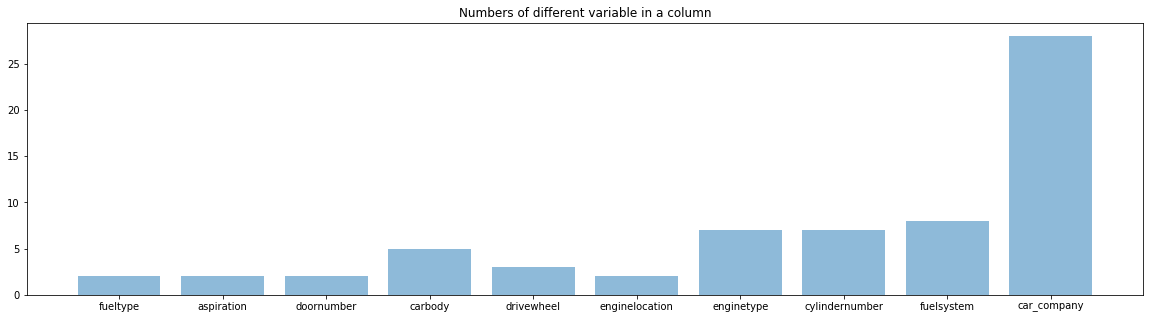

In [23]:
plt.figure(figsize=(20,5))
plt.bar(cat_columns, no_cat_different_variable, align='center', alpha=0.5)
plt.title('Numbers of different variable in a column')
plt.show()

In [24]:
cat_dictionary

{'fueltype': 2,
 'aspiration': 2,
 'doornumber': 2,
 'carbody': 5,
 'drivewheel': 3,
 'enginelocation': 2,
 'enginetype': 7,
 'cylindernumber': 7,
 'fuelsystem': 8,
 'car_company': 28}

### 5 columns have less then 3 different types of categorical value  

* So we replace them by numerical value

In [25]:
car_sales['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [26]:
car_sales['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [27]:
car_sales['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [28]:
car_sales['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

### Data Cleaning

* Here we see slight mis-spelling in **drivewheel** columns as we see the dataset.

* So we change it to same label in our dictionary.

In [29]:
car_sales['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [30]:
car_sales['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

#### We choose this feature as **cylindernumber** as this has numrical value in words

In [31]:
replace_map = {'fueltype': {'gas': 0, 'diesel': 1},'aspiration': {'std': 0, 'turbo': 1},'doornumber': {'four': 4, 'two': 2},'drivewheel': {'fwd': 1, 'rwd': 0,'4wd': 1},'enginelocation': {'front': 1, 'rear': 0},'cylindernumber': {'four': 4, 'six': 6, 'five': 5,'eight': 8, 'two': 2,'twelve': 12, 'three': 3}}

In [32]:
numerical_columns = numerical_columns + ['cylindernumber','doornumber']

In [33]:
car_sales_replace = car_sales.copy()

In [34]:
car_sales_replace.replace(replace_map, inplace=True)

In [35]:
car_sales_replace.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,0,0,2,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,0,0,2,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,0,0,2,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,0,0,4,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,0,0,4,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [36]:
car_sales_replace.select_dtypes(include=['object']).columns.tolist()

['carbody', 'enginetype', 'fuelsystem', 'car_company']

* As **car_company** have 28 different values we will use label encoding for that as we don't want lots of skew columns in our dataset

In [37]:
car_sales_replace['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
vw              2
maxda           2
porcshce        1
vokswagen       1
mercury         1
Nissan          1
toyouta         1
Name: car_company, dtype: int64

In [38]:
labels = car_sales_replace['car_company'].astype('category').cat.categories.tolist()

In [39]:
replace_map_car_company = {'car_company' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_car_company)

{'car_company': {'Nissan': 1, 'alfa-romero': 2, 'audi': 3, 'bmw': 4, 'buick': 5, 'chevrolet': 6, 'dodge': 7, 'honda': 8, 'isuzu': 9, 'jaguar': 10, 'maxda': 11, 'mazda': 12, 'mercury': 13, 'mitsubishi': 14, 'nissan': 15, 'peugeot': 16, 'plymouth': 17, 'porcshce': 18, 'porsche': 19, 'renault': 20, 'saab': 21, 'subaru': 22, 'toyota': 23, 'toyouta': 24, 'vokswagen': 25, 'volkswagen': 26, 'volvo': 27, 'vw': 28}}


In [40]:
car_sales_replace.replace(replace_map_car_company, inplace=True)

In [41]:
car_sales_replace.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,0,0,2,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,2
1,3,0,0,2,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,2
2,1,0,0,2,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,2,0,0,4,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,3
4,2,0,0,4,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,3


### Dummy Variables for rest of the columns

In [42]:
cat_list = car_sales_replace.select_dtypes(include=['object']).columns.tolist()
cat_list

['carbody', 'enginetype', 'fuelsystem']

In [43]:
# Get dummy encoding for all categorical variables 
status = pd.get_dummies(car_sales_replace[cat_list], drop_first = True)

In [44]:
status.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [45]:
# Add the results to the original dataframe

car_sales_replace = pd.concat([car_sales_replace, status], axis = 1)

In [46]:
car_sales_replace.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,2,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,convertible,0,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,hatchback,0,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,sedan,1,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,sedan,1,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [47]:
# Drop 'furnishingstatus' as we have created the dummies for it

car_sales_replace.drop(cat_list, axis = 1, inplace = True)

In [48]:
car_sales_replace.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,2,0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,0,0,2,0,1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,2,0,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,0,4,1,1,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,4,1,1,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets


In [49]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_sales_replace, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

print(numerical_columns)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'cylindernumber', 'doornumber']


In [52]:
print(numerical_columns)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'cylindernumber', 'doornumber']


In [53]:
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

/home/bat/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [54]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0,0,1.0,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,17,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
125,1.0,0,0,0.0,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,19,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
166,0.6,0,0,0.0,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0.0,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
199,0.2,0,1,1.0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,27,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [55]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.090909,0.181818,0.559441,0.650350,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,14.979021,0.020979,0.342657,0.475524,0.132867,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.478536,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,7.464912,0.143818,0.476266,0.501156,0.340624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.000000,0.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.000000,0.000000,1.000000,1.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.000000,0.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,22.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [56]:
col_list = df_train.columns.values.tolist()
col_list.remove('price')
col_list.insert(0,'price')

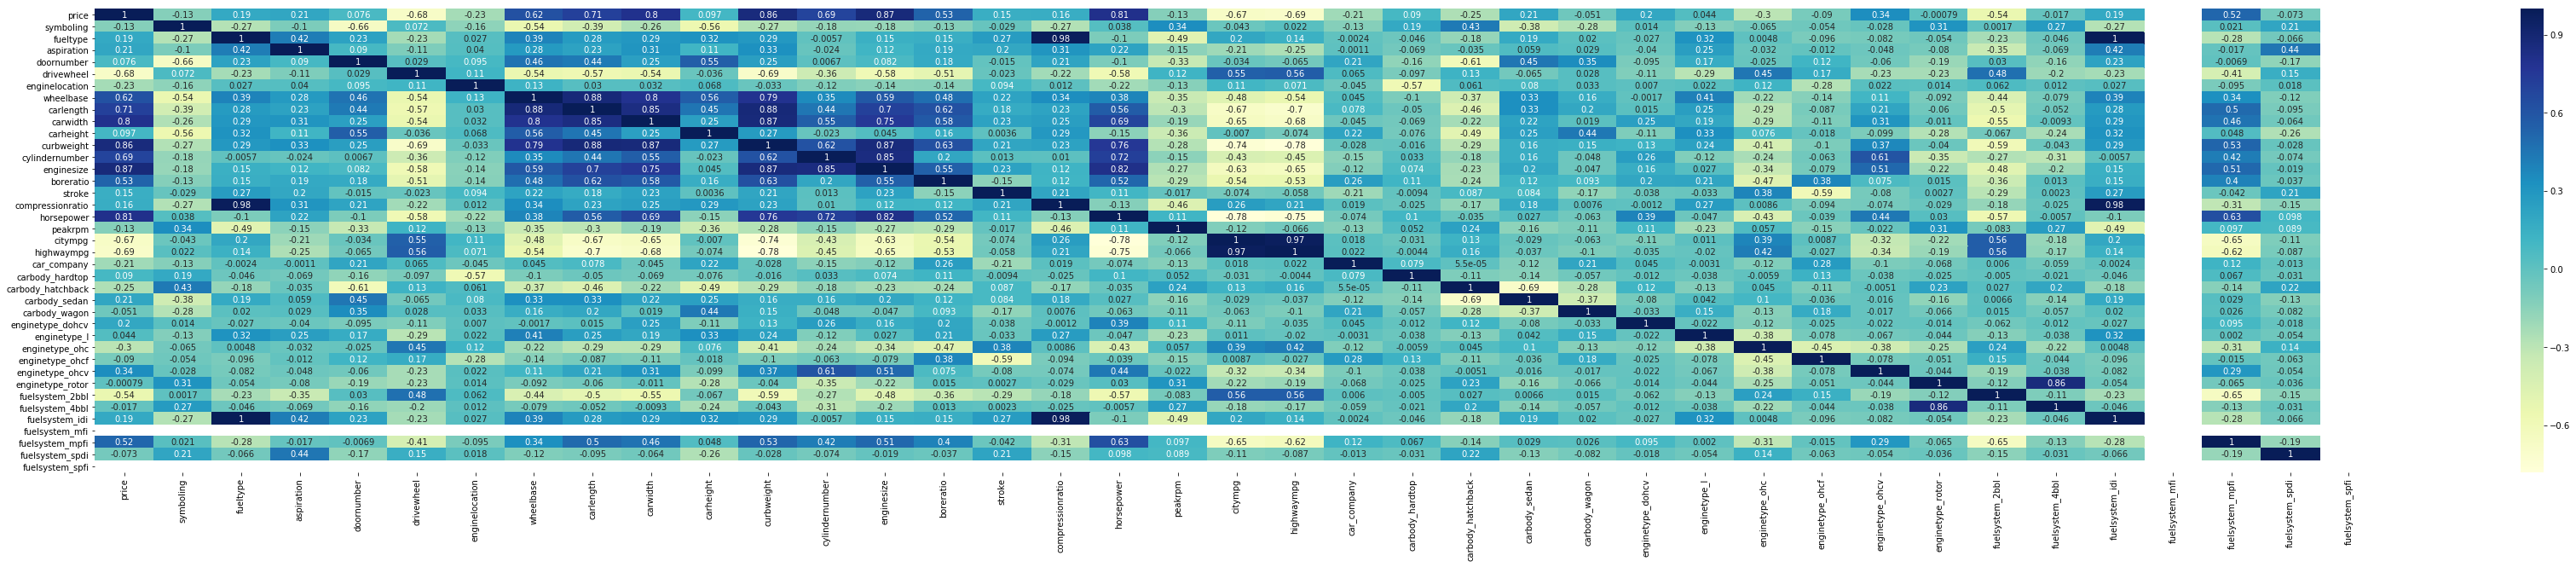

In [57]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (60,10))
sns.heatmap(df_train[col_list].corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `enginesize` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

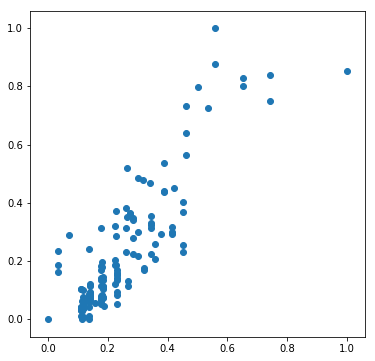

In [58]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

So, we pick `enginesize` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [59]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model


In [60]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [61]:
# Check the parameters obtained

lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

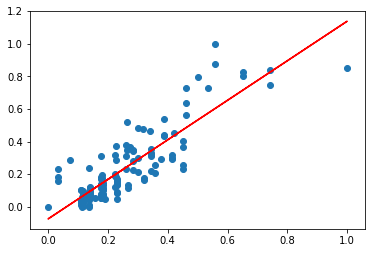

In [62]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.072888 + 1.210676*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [63]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.09e-44
Time:                        22:45:45   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

### Adding another variable

The R-squared value obtained is `0.753`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other 3 most highly correlated variable, i.e. `carwidth`,`curbweight`,`horsepower`.

In [64]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'carwidth','curbweight','horsepower']]

In [65]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.158230
enginesize    0.486169
carwidth      0.207804
curbweight    0.245334
horsepower    0.282452
dtype: float64

In [66]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.91e-51
Time:                        22:45:45   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.826` from `0.753`.

### Adding all the variables to the model

In [67]:
car_sales_replace.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_company', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [68]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                1.437283e-01
symboling            6.133736e-02
fueltype             7.474478e-02
aspiration           5.431008e-02
doornumber           1.221080e-02
drivewheel          -7.049920e-02
enginelocation      -2.498451e-01
wheelbase            1.324184e-01
carlength           -2.867678e-02
carwidth             1.633029e-01
carheight            1.187132e-01
curbweight           2.167769e-01
cylindernumber      -5.016987e-01
enginesize           1.358498e+00
boreratio           -2.647197e-01
stroke              -3.008165e-01
compressionratio    -1.540410e-01
horsepower           1.991348e-01
peakrpm              1.179753e-01
citympg             -5.858717e-03
highwaympg           2.385948e-01
car_company         -3.056407e-03
carbody_hardtop     -1.448426e-01
carbody_hatchback   -1.145381e-01
carbody_sedan       -1.148919e-01
carbody_wagon       -1.351748e-01
enginetype_dohcv     1.869881e-01
enginetype_l        -2.879035e-02
enginetype_ohc       1.241690e-01
enginetype_ohc

In [69]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     43.77
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           5.87e-49
Time:                        22:45:46   Log-Likelihood:                 212.07
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     107   BIC:                            -245.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1437      0.16

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,inf
33,fuelsystem_idi,inf
12,enginesize,342.36
5,enginelocation,225.43
15,compressionratio,215.40
11,cylindernumber,208.42
19,highwaympg,200.15
18,citympg,174.51
10,curbweight,157.43
7,carlength,138.81


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `citympg` as it has a very high p-value of `0.974`. Let's go ahead and drop this variables

In [72]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('citympg', 1)

In [73]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     45.48
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           8.62e-50
Time:                        22:45:46   Log-Likelihood:                 212.07
No. Observations:                 143   AIC:                            -354.1
Df Residuals:                     108   BIC:                            -250.4
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1435      0.16

In [75]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fueltype,inf
32,fuelsystem_idi,inf
12,enginesize,338.83
5,enginelocation,216.34
15,compressionratio,213.77
11,cylindernumber,208.42
10,curbweight,157.18
7,carlength,135.23
13,boreratio,108.13
8,carwidth,84.42


In [76]:
X = X.drop(['fuelsystem_spfi','carlength','fuelsystem_mfi'], 1)

In [77]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [78]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     47.26
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.28e-50
Time:                        22:45:47   Log-Likelihood:                 212.02
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     109   BIC:                            -255.3
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1392      0.16

In [79]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
31,fuelsystem_idi,inf
1,fueltype,inf
11,enginesize,317.66
5,enginelocation,215.88
14,compressionratio,211.83
10,cylindernumber,205.18
9,curbweight,144.08
12,boreratio,98.60
15,horsepower,80.86
7,carwidth,75.56


In [80]:
X = X.drop(['doornumber','compressionratio','enginetype_l','fuelsystem_4bbl','fuelsystem_spdi','fueltype','fuelsystem_idi'], 1)

In [81]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     59.84
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           1.92e-55
Time:                        22:45:47   Log-Likelihood:                 210.81
No. Observations:                 143   AIC:                            -365.6
Df Residuals:                     115   BIC:                            -282.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1349      0.14

In [83]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginesize,277.03
3,enginelocation,186.29
8,cylindernumber,156.65
7,curbweight,120.57
10,boreratio,78.79
11,stroke,69.22
12,horsepower,68.81
5,carwidth,68.14
4,wheelbase,67.33
18,carbody_sedan,40.93


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [84]:
y_train_price = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

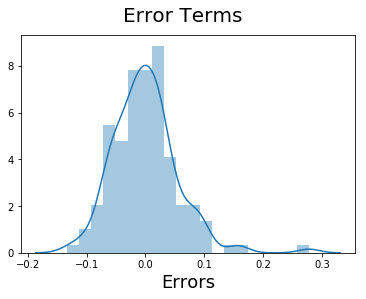

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [86]:
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [87]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.177419,0.564516,0.580645,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,16.596774,0.080645,0.338710,0.451613,0.096774,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.497482,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,7.475555,0.274512,0.477134,0.501716,0.298064,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,12.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,1.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,16.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243,23.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855,27.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [88]:
y_test = df_test.pop('price')
X_test = df_test

In [89]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [90]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m5 = X_test_m5.drop(['fuelsystem_spfi','carlength','fuelsystem_mfi','citympg','doornumber','compressionratio','enginetype_l','fuelsystem_4bbl','fuelsystem_spdi','fueltype','fuelsystem_idi'], axis = 1)

In [91]:
# Making predictions using the fourth model

y_pred_m5 = lr_5.predict(X_test_m5)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

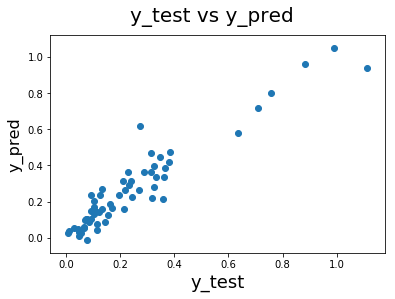

In [92]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

we can see that we allmost getting straight line with prediction data and test data. 

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Substract few more features which have very low correlation.
2. Build a non-linear model also help in this case.

### Explained variance score: 1 is perfect prediction

In [93]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.8791986974572592

* Here we are getting 0.88 which is pretty good overall.

## Important features 

### Here Important 15 features are :-

* symboling
* fueltype
* aspiration
* drivewheel
* enginelocation
* wheelbase
* carwidth
* curbweight
* cylindernumber
* enginesize
* boreratio
* horsepower
* highwaympg
* car_company
* enginetype